**[CPV-01]**

Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[CPV-02]**

Define the Gridworld class.

In [0]:
class Gridworld:
  def __init__(self, size=6, traps=[], alpha=0):
    self.size = size
    self.traps = traps
    self.alpha = alpha
    self.start = (0, 0)
    self.goal = (size-1, size-1)

    self.states = [(x, y) for x in range(size) for y in range(size)]
    self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    self.policy = {}
    for s in self.states:
      self.policy[(s, (-1, 0))] = 0
      self.policy[(s, (0, -1))] = 0
      self.policy[(s, (1, 0))] = 1/2
      self.policy[(s, (0, 1))] = 1/2

    self.value = {}
    for s in self.states:
      self.value[s] = 0
   
  def move(self, s, a):
    if s == self.goal:
      return [(1, 0, s)]      # Probability, Reward, Next state

    s_new = (s[0] + a[0], s[1] + a[1])

    if s_new not in self.states:
      # Give a penalty to a non-moving action.
      return [(1, -1, s)]     # Probability, Reward, Next state

    if s_new in self.traps:
      # Probability, Reward, Next state
      return [(self.alpha, -1, self.start), (1-self.alpha, -1, self.goal)]

    return [(1, -1, s_new)]   # Probability, Reward, Next state

**[CPV-03]**

Define a function to apply the policy evaluation algorithm until conversion.

In [0]:
def policy_eval(world, gamma=1, delta=0.01):
  result = []
  while True:
    delta_max = 0
    for s in world.states:
      v_new = 0
      for a in world.actions:
        results = world.move(s, a)
        for p, r, s_new in results:
          v_new += world.policy[(s, a)] * p * (r + gamma * world.value[s_new])
      delta_max = max(delta_max, abs(world.value[s] - v_new))
      world.value[s] = v_new
    result.append(world.value[(0, 0)])

    if delta_max < delta:
      break

  return result

**[CPV-04]**

Define a function to apply the policy update algorithm.

In [0]:
def policy_update_all(world, gamma=1):
  update = False
  for s in world.states:
    q_max = -10**10
    a_best = None
    for a in world.actions:
      results = world.move(s, a)
      q = 0
      for p, r, s_new in results:
        q += p * (r + gamma * world.value[s_new])
      if q > q_max:
        q_max = q
        a_best = a

    if world.policy[(s, a_best)] != 1:
      update = True
    for a in world.actions:
      world.policy[(s, a)] = 0
    world.policy[(s, a_best)] = 1
  
  return update

**[CPV-05]**

Define a function to apply the policy iteration algorithm.

In [0]:
def policy_iteration(world):
  result = [world.value[(0, 0)]]
  while True:
    print('.', end='')
    result += policy_eval(world)
    if not policy_update_all(world):
      print('\n')
      break

  return result

**[CPV-06]**

Define a function to update the greedy policy for a spedific state.

In [0]:
def policy_update_s(world, s, gamma=1):
  q_max = -10**10
  a_best = None
  for a in world.actions:
    results = world.move(s, a)
    q = 0
    for p, r, s_new in results:
      q += p * (r + gamma * world.value[s_new])
    if q > q_max:
      q_max = q
      a_best = a

  for a in world.actions:
    world.policy[(s, a)] = 0
  world.policy[(s, a_best)] = 1
  
  return q_max

**[CPV-06]**

Define a function to apply the value iteration algorithm.

In [0]:
def value_iteration(world, delta=0.01):
  result = [world.value[(0, 0)]]
  while True:
    delta_max = 0
    print('.', end='')
    for s in world.states:
      v_new = policy_update_s(world, s)  # Policy update
      delta_max = max(delta_max, abs(world.value[s] - v_new))
      world.value[s] = v_new           # Value update
    result.append(world.value[(0, 0)])

    if delta_max < delta:
      print('\n')
      break

  return result

**[CPV-07]**

Define a gridworld (α=0.5) and apply the policy iteration algorithm.

....

Final value of world.value[(0, 0)] = -8.013211626582287


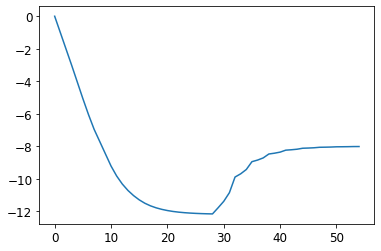

In [0]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.5)
result = policy_iteration(world)
plt.plot(range(len(result)), result)
print('Final value of world.value[(0, 0)] = {}'.format(result[-1]))

**[CPV-08]**

Define a gridworld (α=0.5) and apply the value iteration algorithm.

........................

Final value of world.value[(0, 0)] = -7.9609375


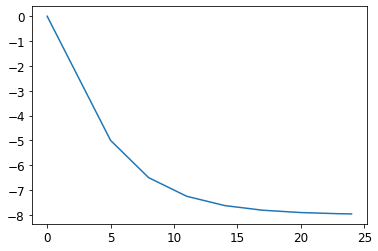

In [0]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.5)
result = value_iteration(world)
plt.plot(range(len(result)), result)
print('Final value of world.value[(0, 0)] = {}'.format(result[-1]))